In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
%matplotlib notebook
from scipy import *
from tqdm.notebook import *
import sys
import seaborn as sns
sns.set_theme(style="whitegrid")
import time
from numba import jit
from numpy import imag


#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

# Simulation of the Brownian Motion

### Parameters:

In [6]:
#### system parameters
kx = 1.
k = np.array([kx,kx,kx])
diff = 0.1
gama = 0.000001

# particle param.:
m = 1.
# simulation parameters
N = 5
T = 2**15
print(T)

delta_t = 0.0001
delta_x = 0.0
delta_v = 0.

time_axis = np.arange(0, T*delta_t, delta_t)

k_b = 1.32 * 10**(-23)

print("Temperature =", gama*diff/k_b)
print("Optical trap characteristic time =", np.max(gama/k))
print("Time interval =", delta_t)
print("Momentum relaxation time =", m/gama)

32768
Temperature = 7575757575757575.0
Optical trap characteristic time = 1e-06
Time interval = 0.0001
Momentum relaxation time = 1000000.0


### Simulate:

In [7]:
# RK4
sys.path.append("Simulation/RK4")

import brownian_motion_sim as sim

start = time.time()
data = sim.main(k, gama, diff, m, N, T, delta_t)  # runs the runs the simulation starter
stop = time.time()
print(stop-start)

2.831672430038452


### Potential field:

<ipython-input-8-f08782015e20>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  F = F + [-1.*k[axis]*r[axis] for axis in range(3)]


<IPython.core.display.Javascript object>


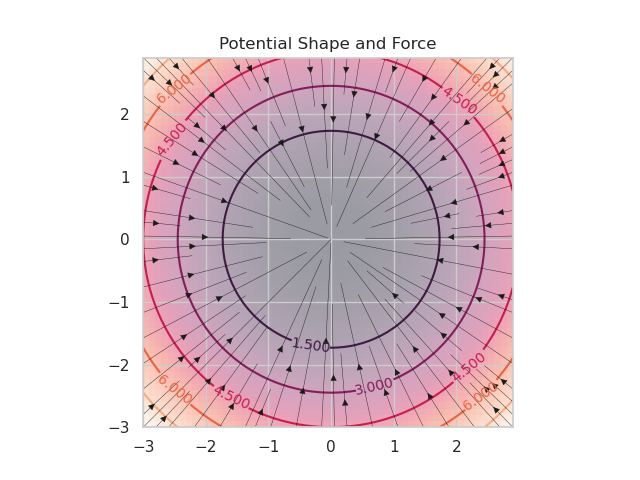

Text(0.5, 1.0, 'Potential Shape and Force')

In [8]:
x = np.arange(-3,3,0.1) 
y = np.arange(-3,3,0.1)
xx,yy = np.meshgrid(x,y)

def force(r, k):
    F = np.array([0.,0.,0.])
    F = F + [-1.*k[axis]*r[axis] for axis in range(3)]
    return F

Fx,Fy,Fz = force([xx,yy,0.], k)
V = (Fx**2)/(2*k[0]) + (Fy**2)/(2*k[1]) + (Fz**2)/(2*k[2])

subplots()
imshow(V,extent=[np.min(x),np.max(x),np.min(y),np.max(y)],origin='lower',alpha=0.4)
CS = contour(V,extent=[np.min(x),np.max(x),np.min(y),np.max(y)])
clabel(CS, CS.levels, inline=True, fontsize=10)
streamplot(xx,yy,Fx,Fy, density=[1, 1],color='k', linewidth=0.3)
title('Potential Shape and Force')

### Plotting:

<IPython.core.display.Javascript object>


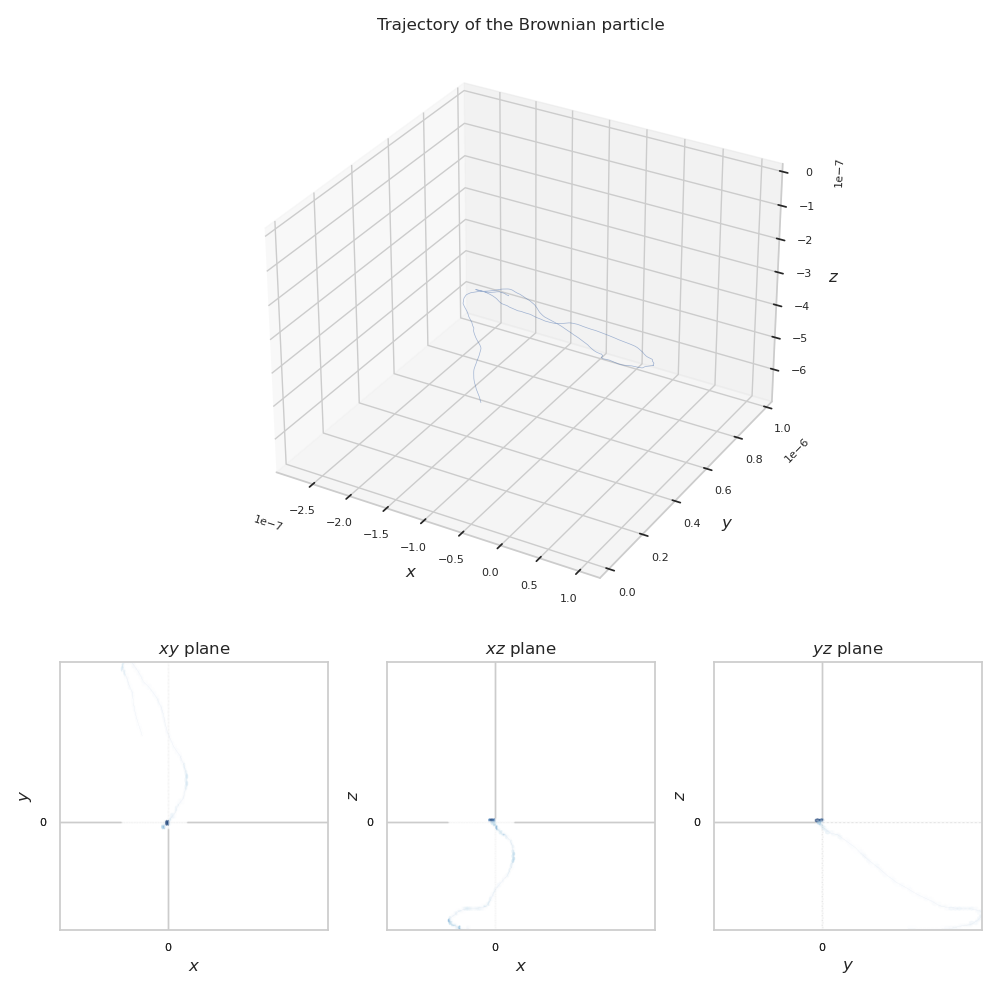

(-6.876092454051412e-07, 8.524745057035008e-09)

In [9]:
from scipy.stats import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

%matplotlib notebook

###########################################################################
#ignore this, just to define a colormap that goes to transparent for hexbin
cmap = cm.Blues
my_cmap = cmap(np.arange(cmap.N))
alphas = np.linspace(0, 1, cmap.N)
BG = np.asarray([1., 1., 1.,])
for i in range(cmap.N):
    my_cmap[i,:-1] = my_cmap[i,:-1] * alphas[i] + BG * (1.-alphas[i])
my_cmap = ListedColormap(my_cmap)
###########################################################################4

#####Plots#################################################################
fig = figure(figsize=(10,10))
    
gs = fig.add_gridspec(2,3,height_ratios = [2,1], width_ratios= [1,1,1])
    
rcParams.update({'font.size': 12})
rc('xtick', labelsize=8) 
rc('ytick', labelsize=8) 
    


fig.set_tight_layout(True)

plot_step = 5
x_d = data[1,:,0]
y_d = data[1,:,1]
z_d = data[1,:,2]

xmin, xmax = np.min(x_d),np.max(x_d)
ymin, ymax = np.min(y_d),np.max(y_d)
zmin, zmax = np.min(z_d),np.max(z_d)

########xy plane##############

ax = fig.add_subplot(gs[1,0])
ax.hexbin(x_d,y_d, cmap=my_cmap, gridsize=40,alpha=0.5)
#contourf(np.transpose(f), cmap = 'Blues', aspect='auto', extent = [xmin,xmax,ymin,ymax],alpha=1.,origin='lower')
ax.plot(x_d,y_d, alpha=0.2, color='b', lw=0.1)

range_min = min([xmin,ymin,zmin])
range_max = max([xmax,ymax,zmax])
ax.set_xlim([range_min,range_max])
ax.set_ylim([range_min,range_max])
ax.set_xticks([np.round(range_min,1),np.round(range_max,1)])
ax.set_yticks([np.round(range_min,1),np.round(range_max,1)])

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_title(r"$xy$ plane")
ax.set_aspect('equal')


########xz plane##############
ax = fig.add_subplot(gs[1,1])
ax.hexbin(x_d,z_d, cmap=my_cmap, gridsize=40,alpha=0.5)
#contourf(np.transpose(f), cmap = 'Blues', aspect='auto', extent = [xmin,xmax,ymin,ymax],alpha=1.,origin='lower')
ax.plot(x_d,z_d, alpha=0.2, color='b', lw=0.1)

range_min = min([xmin,ymin,zmin])
range_max = max([xmax,ymax,zmax])
ax.set_xlim([range_min,range_max])
ax.set_ylim([range_min,range_max])
ax.set_xticks([np.round(range_min,1),np.round(range_max,1)])
ax.set_yticks([np.round(range_min,1),np.round(range_max,1)])

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$z$')
ax.set_title(r"$xz$ plane")
ax.set_aspect('equal')

########yz plane##############
ax = fig.add_subplot(gs[1,2])
ax.hexbin(y_d,z_d, cmap=my_cmap, gridsize=40,alpha=0.5)
#contourf(np.transpose(f), cmap = 'Blues', aspect='auto', extent = [xmin,xmax,ymin,ymax],alpha=1.,origin='lower')
ax.plot(y_d,z_d, alpha=0.2, color='b', lw=0.1)

range_min = min([xmin,ymin,zmin])
range_max = max([xmax,ymax,zmax])
ax.set_xlim([range_min,range_max])
ax.set_ylim([range_min,range_max])
ax.set_xticks([np.round(range_min,1),np.round(range_max,1)])
ax.set_yticks([np.round(range_min,1),np.round(range_max,1)])

ax.set_xlabel(r'$y$')
ax.set_ylabel(r'$z$')
ax.set_title(r"$yz$ plane")
ax.set_aspect('equal')
        

##########3d Plot###############
ax = ax = fig.add_subplot(gs[0,:],projection='3d')
line = plot(x_d,y_d,z_d, lw=0.5, c='b',alpha=0.5) # For line plot
step=10

 
# AXES PROPERTIES]
# ax.set_xlim3d([limit0, limit1])
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$')
ax.set_title('Trajectory of the Brownian particle')
ax.set_xlim((xmin,xmax))
ax.set_ylim((ymin,ymax))
ax.set_zlim((zmin,zmax))

#ax.set_xticks([np.round(xmin,1),np.round(xmax,1)])
#ax.set_yticks([np.round(ymin,1),np.round(ymax,1)])
#ax.set_zticks([np.round(zmin,1),np.round(zmax,1)])





### Signals Obtained:

<IPython.core.display.Javascript object>


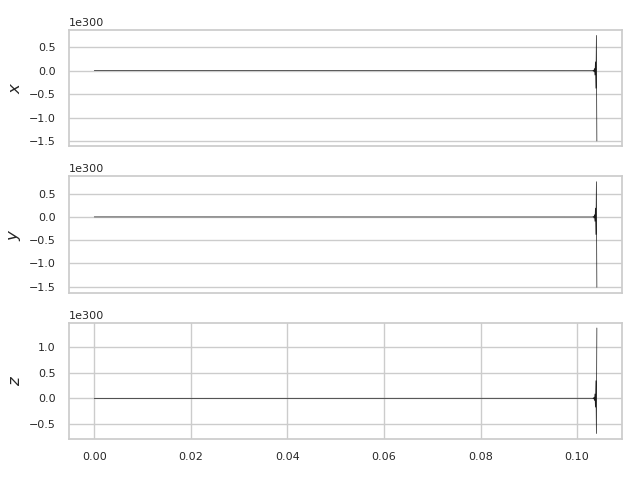

In [32]:
#Plots of the signals [x(t),y(t),z(t)]
subplots()
subplot(311)
ax=gca()
ax.plot(time_axis, x_d, color = 'k', lw =0.5)
ax.set_xticks([])
ax.set_ylabel(r'$x$')
subplot(312)
ax=gca()
ax.plot(time_axis, y_d, color = 'k', lw =0.5)
ax.set_xticks([])
ax.set_ylabel(r'$y$')
subplot(313)
ax=gca()
ax.plot(time_axis, z_d , color = 'k', lw =0.5)
ax.set_ylabel(r'$z$')
tight_layout()

# 1. Stiffness computation using standard deviation

In [ ]:
sys.path.append("Calibration/std_dev")  # add folder with calibration scripts

import std_dev as sd  # import the potential analysis script

k_estimate, k_var = sd.main(data, gama, diff)

print(k_estimate , r"\pm", np.sqrt(k_var))

# 2. Stiffness computation using Power Spectral Density

In [ ]:
fc = k[0]/(2*np.pi*gama)
def Lorentzian(f, fc, D):
    return D/(2*np.pi**2 * (fc**2 + f**2))

plt.figure(9)
plt.step(bins, density)

In [ ]:
def counting(P, pos, bins):  # counts the frequency in each bin window
    frequency = np.zeros(P)
    running_index = 0  # variable to avoid cycles counting the same values
    for i in range(1,P):
        bin_frequency = 0
        while pos[running_index] >= bins[i-1] and pos[running_index] <= bins[i] and running_index < pos.shape[0]-1:
            bin_frequency += 1
            running_index += 1
        frequency[i] = bin_frequency  # later alter this to avoid creating the "bin_frequency" variable
    return frequency/(np.sum(frequency)*(bins[1] - bins[0]))

def exp_mean(data):
    mean = np.full((data.shape[1],3),0.)
    for b in range(data.shape[1]):
        for axis in range(3):
            mean[b, axis] = np.sum(data[::, b, axis])/data.shape[0]
    return mean

P = 100

fc = k[0]/(2*np.pi*gama)

def Lorentzian(f, fc, D):
    return D/(2*np.pi**2 * (fc**2 + f**2))

def FT(k, data, delta_t):
    inte = 0.
    for i in range(data.shape[0]):
        inte += delta_t * data[i] * np.exp(1.0j * 2 * np.pi * (i+1) * k / data.shape[0])
    return inte


def main(data, P, delta_t, n, counting = counting, exp_mean = exp_mean, Lorentzian = Lorentzian, FT = FT):
    import scipy as sp
    from scipy.fft import fft, rfft
    freq = np.fft.fftfreq(data.size, delta_t)

    ft_data = delta_t*np.fft.fft(data)
    ft_data = ft_data
    ft_data = np.abs(ft_data)**2
    
    
    plt.figure(29)
    plt.plot(freq, ft_data)

    """
    #compression routine
    if data.shape[0]%n != 0:
        return "Cannot compress! Number of frequencies is not divisable by the number of subdomains n."
    else:
        compressed_data = np.zeros(n)
        compressed_freq = np.zeros(n)
        bin_tracker = 0
        for cycle in range(n):
            for i in range(int(ft_data.shape[0]/n)):
                compressed_data[cycle] += ft_data[bin_tracker+i]/(ft_data.shape[0]/n)
                compressed_freq[cycle] += freq[bin_tracker+i]/(ft_data.shape[0]/n)
            bin_tracker += int(ft_data.shape[0]/n)
    
    plt.figure(29)
    plt.plot(compressed_freq, compressed_data)
    """

print(fc)
    
n = 2**20 # compression
main(data[0,:,0], P, delta_t, n)


def Lorentzian(f, fc, D):
    return D/(2*np.pi**2 * (fc**2 + f**2))

plt.plot(np.linspace(-4.,4.,1000), 500*Lorentzian(np.linspace(-4.,4.,1000),fc,diff))
#plt.xlim(0.4, 0.6)
plt.show()

In [ ]:

data_spectrum = np.full((data.shape[0]), 0.,dtype = 'complex_')  # [exp, t, axis]

    #compression routine
    if data.shape[1]%n != 0:
        return "Cannot compress! Number of frequencies is not divisable by the number of subdomains n."
    else:
        compressed_data = np.zeros(n,dtype = 'complex_')
        compressed_freq = np.zeros(n)
        bin_tracker = 0
        for cycle in range(n):
            for i in range(int(data_spectrum.shape[0]/n)):
                compressed_data[cycle] += data_spectrum[bin_tracker+i]/(data_spectrum.shape[0]/n)
                compressed_freq[cycle] += f[bin_tracker+i]/(data_spectrum.shape[0]/n)
            bin_tracker += int(data_spectrum.shape[0]/n)

# 3. Stiffness computation using Boltzmann Statistics

In [ ]:
sys.path.append("Calibration/potential_analysis")  # add folder with calibration scripts

P = 100

import potential_analysis as pa  # import the potential analysis script
mean_density, variance, bins = pa.main(data, N, P, T, gama, diff)


import matplotlib.pyplot as plt
def normal(x, k, gama, diff):
    return np.sqrt(k/(2 * gama * diff * np.pi)) * np.exp(-k * (x**2)/(2 * gama * diff))

x_axis = np.linspace(np.min(bins),np.max(bins), 100)
y_axis = np.linspace(np.min(bins),np.max(bins), 100)
z_axis = np.linspace(np.min(bins),np.max(bins), 100)

dx_axis = x_axis[1]-x_axis[0]
dy_axis = y_axis[1]-y_axis[0]
dz_axis = z_axis[1]-z_axis[0]

fig1, (axs1, axs2, axs3) = subplots(3, figsize=(10,10))
axs1.plot(x_axis, normal(x_axis, k[0],gama,diff))
axs1.bar(bins[:, 0], mean_density[:, 0], yerr = np.sqrt(variance[:,0]), width=(bins[1,0]-bins[0,0]), label = "x", color="r")
axs1.legend()
axs2.plot(y_axis, normal(y_axis, k[1],gama,diff))
axs2.bar(bins[:, 1], mean_density[:, 1], yerr = np.sqrt(variance[:,1]), width=(bins[1,1]-bins[0,1]), label = "y", color="g")
axs2.legend()
axs3.plot(z_axis, normal(z_axis, k[2],gama,diff))
axs3.bar(bins[:, 2], mean_density[:, 2], yerr = np.sqrt(variance[:,2]), width=(bins[1,2]-bins[0,2]), label = "z", color="b")
axs3.legend()